In [1]:
import os
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import sys
import math
from netCDF4 import Dataset
import os, calendar, sys, fnmatch, datetime
import scipy

## Read in Yue coordinate matrix and Yue dust optical properties matrices

In [4]:
Qe_matrix = io.loadmat('Qe_matrix.mat')
Qe_matrix = Qe_matrix['array']

SSA_matrix = io.loadmat('SSA_matrix.mat')
SSA_matrix = SSA_matrix['array']

g_matrix = io.loadmat('g_matrix.mat')
g_matrix = g_matrix['array']


In [10]:
# coordinate matrix
Yue_coord_matrix = io.loadmat('coordinate_matrix_tuple.mat')
print(Yue_coord_matrix.keys())
Yue_coord_matrix = Yue_coord_matrix['array']
Yue_coord_matrix = Yue_coord_matrix[0]
print(Yue_coord_matrix[0][0])

dict_keys(['__header__', '__version__', '__globals__', 'array'])
[3.30693964e-01 4.16674394e-01 4.18879020e-01 5.25142014e-01
 5.27787566e-01 5.71198664e-01 6.62049315e-01 6.65179885e-01
 7.19710317e-01 8.34340870e-01 8.38595799e-01 8.97597901e-01
 9.07063479e-01 1.05160680e+00 1.05683177e+00 1.13097336e+00
 1.14353973e+00 1.32542141e+00 1.33203529e+00 1.42538547e+00
 1.44113423e+00 1.67033521e+00 1.67886711e+00 1.79699100e+00
 1.81641175e+00 2.10519777e+00 2.11575793e+00 2.26463950e+00
 2.28936425e+00 2.65315767e+00 2.66658384e+00 2.85436133e+00
 2.88512445e+00 3.34397736e+00 3.36066638e+00 3.59757239e+00
 3.63625070e+00 4.21436387e+00 4.23570466e+00 4.53376700e+00
 4.58272688e+00 5.31127575e+00 5.33819424e+00 5.71410824e+00
 5.77596089e+00 6.69390721e+00 6.72761595e+00 7.20142796e+00
 7.27935578e+00 8.43666440e+00 8.47894913e+00 9.07650998e+00
 9.17402175e+00 1.06328030e+01 1.06864416e+01 1.14389877e+01
 1.15622034e+01 1.34007115e+01 1.34682171e+01 1.44163199e+01
 1.45724203e+01 1.68

In [11]:
print(Qe_matrix.shape)
print(SSA_matrix.shape)
print(g_matrix.shape)
print(Yue_coord_matrix.shape)

(120, 4, 4)
(120, 4, 4)
(120, 4, 4)
(3,)


In [12]:
tuple1 = Yue_coord_matrix[0][0]
tuple2 = Yue_coord_matrix[1][0]
tuple3 = Yue_coord_matrix[2][0]
tuple_array = (tuple1, tuple2, tuple3)
print(tuple_array)

(array([3.30693964e-01, 4.16674394e-01, 4.18879020e-01, 5.25142014e-01,
       5.27787566e-01, 5.71198664e-01, 6.62049315e-01, 6.65179885e-01,
       7.19710317e-01, 8.34340870e-01, 8.38595799e-01, 8.97597901e-01,
       9.07063479e-01, 1.05160680e+00, 1.05683177e+00, 1.13097336e+00,
       1.14353973e+00, 1.32542141e+00, 1.33203529e+00, 1.42538547e+00,
       1.44113423e+00, 1.67033521e+00, 1.67886711e+00, 1.79699100e+00,
       1.81641175e+00, 2.10519777e+00, 2.11575793e+00, 2.26463950e+00,
       2.28936425e+00, 2.65315767e+00, 2.66658384e+00, 2.85436133e+00,
       2.88512445e+00, 3.34397736e+00, 3.36066638e+00, 3.59757239e+00,
       3.63625070e+00, 4.21436387e+00, 4.23570466e+00, 4.53376700e+00,
       4.58272688e+00, 5.31127575e+00, 5.33819424e+00, 5.71410824e+00,
       5.77596089e+00, 6.69390721e+00, 6.72761595e+00, 7.20142796e+00,
       7.27935578e+00, 8.43666440e+00, 8.47894913e+00, 9.07650998e+00,
       9.17402175e+00, 1.06328030e+01, 1.06864416e+01, 1.14389877e+01,
     

In [13]:
print(Qe_matrix[0])

[[0.00579967 0.00632022 0.00770392 0.0086648 ]
 [0.01248496 0.01330467 0.01139741 0.01176294]
 [0.01326303 0.01411491 0.01287314 0.01318581]
 [0.0149366  0.01585537 0.01647204 0.01705219]]


In [14]:
print(type(Yue_coord_matrix))

<class 'numpy.ndarray'>


## Use these matrices to interpolate the values of Qext, SSA, and g and compare the results against Figure 2 in Huang et al. (2023)? The results plotted there were obtained for n =1.53 and k = 10^(-2.75) (except for panel c). If they agree we know the procedure was successful.

In [15]:
n =1.53
print(type(n))
k = 10**(-2.750)
print(type(k))
#wavelength_550 = float(550*(10**-3)) #500nm *10^-3 = um
wavelength_10um = float(10) #10 um = 10 * 10^3 nm
print(type(wavelength_10um))

<class 'float'>
<class 'float'>
<class 'float'>


In [16]:
# Define the Yue dust diamater range arrays
diameter_range_1 = np.logspace(np.log(0.1), np.log(20), 230) #in um
diameter_range_2 = np.logspace(np.log(20.5), np.log(70), 70) #in um

# Concatenate the arrays
diameter_range = np.concatenate((diameter_range_1, diameter_range_2))
print(len(diameter_range))

300


In [17]:
print(Qe_matrix.shape, Qe_matrix)

(120, 4, 4) [[[0.00579967 0.00632022 0.00770392 0.0086648 ]
  [0.01248496 0.01330467 0.01139741 0.01176294]
  [0.01326303 0.01411491 0.01287314 0.01318581]
  [0.0149366  0.01585537 0.01647204 0.01705219]]

 [[0.01340117 0.014065   0.01592071 0.01716373]
  [0.02430584 0.02540136 0.02369377 0.02403838]
  [0.02728247 0.02849257 0.02702707 0.02725993]
  [0.03362425 0.03507405 0.03559898 0.03619906]]

 [[0.0135232  0.01418854 0.01615054 0.01741957]
  [0.02362136 0.0246824  0.02380374 0.02430806]
  [0.02674221 0.02792281 0.02715652 0.0275623 ]
  [0.03367749 0.03512014 0.03594494 0.03667028]]

 ...

 [[       nan        nan        nan        nan]
  [       nan        nan        nan        nan]
  [       nan        nan        nan        nan]
  [       nan        nan        nan        nan]]

 [[       nan        nan        nan        nan]
  [       nan        nan        nan        nan]
  [       nan        nan        nan        nan]
  [       nan        nan        nan        nan]]

 [[       na

# 550 nm wavelength Qe plots

In [18]:
# Check if size_parameter is within the range of tuple_array
min_size = Yue_coord_matrix[0][0][0]
max_size = Yue_coord_matrix[0][0][-1]

In [19]:
Qe_interp_matrix = [] #np.zeros(120, dtype=object)
Qe_interp_only = []
plot_range = []
for i in range(len(diameter_range)):
    size_parameter = np.pi * diameter_range[i] / wavelength_10um
    #print(size_parameter)

    if size_parameter < min_size or size_parameter > max_size:
        print("size_parameter is out of range: " +str(size_parameter))
    else:
        #print("size_parameter is within the range.")
        point = np.array([size_parameter, n, k])
        #Qe_interp = scipy.interpolate.interpn(Yue_coord_matrix, Qe_matrix, point)
        plot_range.append(size_parameter  * wavelength_10um / np.pi)
        Qe_interp = scipy.interpolate.interpn(tuple_array, Qe_matrix,[size_parameter, n, k])
        Qe_interp_only.append(Qe_interp[0])
        Qe_interp_matrix.append([size_parameter,n,k,Qe_interp[0]])

size_parameter is out of range: 0.0015651817655340007
size_parameter is out of range: 0.0016508268989609443
size_parameter is out of range: 0.0017411584458391818
size_parameter is out of range: 0.0018364328418838311
size_parameter is out of range: 0.0019369205547080995
size_parameter is out of range: 0.0020429068516343023
size_parameter is out of range: 0.0021546926095186865
size_parameter is out of range: 0.0022725951688890482
size_parameter is out of range: 0.0023969492348198673
size_parameter is out of range: 0.0025281078271024186
size_parameter is out of range: 0.0026664432824071993
size_parameter is out of range: 0.002812348311283659
size_parameter is out of range: 0.00296623711299785
size_parameter is out of range: 0.003128546551372874
size_parameter is out of range: 0.0032997373949700828
size_parameter is out of range: 0.003480295625131723
size_parameter is out of range: 0.003670733815598326
size_parameter is out of range: 0.0038715925876173403
size_parameter is out of range: 0.

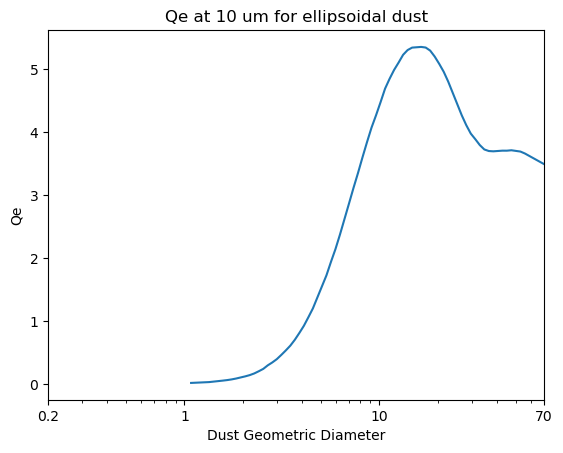

In [27]:
plt.plot(plot_range,Qe_interp_only)
plt.ylabel('Qe')
plt.xlabel('Dust Geometric Diameter')
plt.xscale('log')
plt.xlim(0.2,70)
plt.title('Qe at 10 um for ellipsoidal dust')

# Customize x-axis ticks and labels
plt.xticks([0.2, 1, 10, 70], ['0.2', '1', '10', '70'])  # Adjust these values according to your data
plt.show()

# SSA interpolation

In [21]:
SSA_interp_matrix = [] #np.zeros(120, dtype=object)
SSA_interp_only = []
k_SSA = [0.0005, 0.001, 0.003]
plot_range = []
for i in range(len(diameter_range)):
    size_parameter = np.pi * diameter_range[i] / wavelength_10um
    #print(size_parameter)

    if size_parameter < min_size or size_parameter > max_size:
        print("size_parameter is out of range: " +str(size_parameter))
    else:
        #print("size_parameter is within the range.")
        point = np.array([size_parameter, n, k_SSA])
        #Qe_interp = scipy.interpolate.interpn(Yue_coord_matrix, Qe_matrix, point)
        plot_range.append(size_parameter  * wavelength_10um / np.pi)
        SSA_interp = scipy.interpolate.interpn(tuple_array, SSA_matrix,[size_parameter, n, k])
        SSA_interp_only.append(SSA_interp[0])
        SSA_interp_matrix.append([size_parameter,n,k,SSA_interp[0]])

size_parameter is out of range: 0.0015651817655340007
size_parameter is out of range: 0.0016508268989609443
size_parameter is out of range: 0.0017411584458391818
size_parameter is out of range: 0.0018364328418838311
size_parameter is out of range: 0.0019369205547080995
size_parameter is out of range: 0.0020429068516343023
size_parameter is out of range: 0.0021546926095186865
size_parameter is out of range: 0.0022725951688890482
size_parameter is out of range: 0.0023969492348198673
size_parameter is out of range: 0.0025281078271024186
size_parameter is out of range: 0.0026664432824071993
size_parameter is out of range: 0.002812348311283659
size_parameter is out of range: 0.00296623711299785
size_parameter is out of range: 0.003128546551372874
size_parameter is out of range: 0.0032997373949700828
size_parameter is out of range: 0.003480295625131723
size_parameter is out of range: 0.003670733815598326
size_parameter is out of range: 0.0038715925876173403
size_parameter is out of range: 0.

([<matplotlib.axis.XTick at 0x7fcb5b0f6430>,
 [Text(0.2, 0, '0.2'),
  Text(1.0, 0, '1'),
  Text(10.0, 0, '10'),
  Text(70.0, 0, '70')])

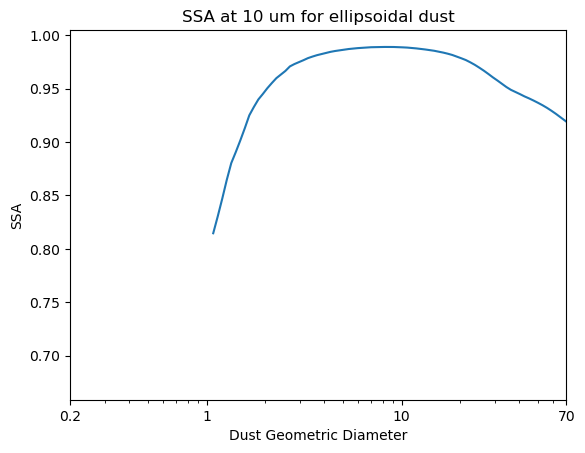

In [22]:
plt.plot(plot_range,SSA_interp_only)
plt.ylabel('SSA')
plt.xlabel('Dust Geometric Diameter')
plt.xscale('log')
plt.xlim(0.2,70)
plt.title('SSA at 10 um for ellipsoidal dust')
# Customize x-axis ticks and labels
plt.xticks([0.2, 1, 10, 70], ['0.2', '1', '10', '70'])  # Adjust these values according to your data

# g interpolation

In [23]:
g_interp_matrix = [] #np.zeros(120, dtype=object)
g_interp_only = []
plot_range = []
for i in range(len(diameter_range)):
    size_parameter = np.pi * diameter_range[i] / wavelength_10um
    #print(size_parameter)

    if size_parameter < min_size or size_parameter > max_size:
        print("size_parameter is out of range: " +str(size_parameter))
    else:
        #print("size_parameter is within the range.")
        point = np.array([size_parameter, n, k])
        #Qe_interp = scipy.interpolate.interpn(Yue_coord_matrix, Qe_matrix, point)
        plot_range.append(size_parameter  * wavelength_10um / np.pi)
        g_interp = scipy.interpolate.interpn(tuple_array, g_matrix,[size_parameter, n, k])
        g_interp_only.append(g_interp[0])
        g_interp_matrix.append([size_parameter,n,k,g_interp[0]])

size_parameter is out of range: 0.0015651817655340007
size_parameter is out of range: 0.0016508268989609443
size_parameter is out of range: 0.0017411584458391818
size_parameter is out of range: 0.0018364328418838311
size_parameter is out of range: 0.0019369205547080995
size_parameter is out of range: 0.0020429068516343023
size_parameter is out of range: 0.0021546926095186865
size_parameter is out of range: 0.0022725951688890482
size_parameter is out of range: 0.0023969492348198673
size_parameter is out of range: 0.0025281078271024186
size_parameter is out of range: 0.0026664432824071993
size_parameter is out of range: 0.002812348311283659
size_parameter is out of range: 0.00296623711299785
size_parameter is out of range: 0.003128546551372874
size_parameter is out of range: 0.0032997373949700828
size_parameter is out of range: 0.003480295625131723
size_parameter is out of range: 0.003670733815598326
size_parameter is out of range: 0.0038715925876173403
size_parameter is out of range: 0.

([<matplotlib.axis.XTick at 0x7fcb48880730>,
 [Text(0.2, 0, '0.2'),
  Text(1.0, 0, '1'),
  Text(10.0, 0, '10'),
  Text(70.0, 0, '70')])

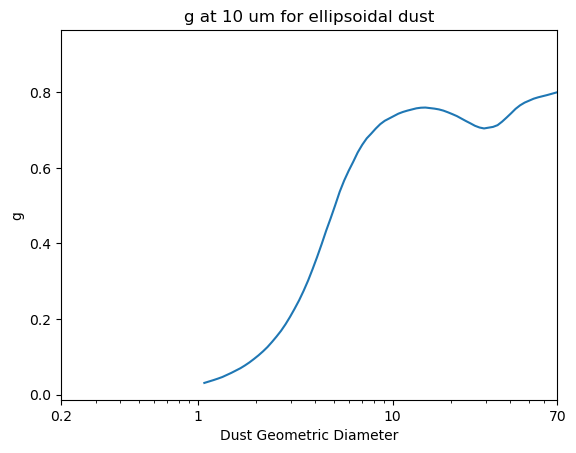

In [24]:
plt.plot(plot_range,g_interp_only)
plt.ylabel('g')
plt.xlabel('Dust Geometric Diameter')
plt.xscale('log')
plt.xlim(0.2,70)
plt.title('g at 10 um for ellipsoidal dust')
# Customize x-axis ticks and labels
plt.xticks([0.2, 1, 10, 70], ['0.2', '1', '10', '70'])  # Adjust these values according to your data